<div style="width: 80%; display: flex; justify-content: flex-start; align-items: center; margin-left: 20%;">
    <img src="https://docs.classiq.io/resources/classiq-logo.svg" alt="classiq_logo" width="400" height="auto" style="margin-right: 50px;" />
    <img src="https://docs.classiq.io/resources/pushquantum_logo.png" alt="pushquantum_logo" width="400" height="auto" />
</div>

# Classiq Challange: Estimating Molecular Spectra Using the Rodeo Algorithm

Welcome to the Classiq challenge of the 2024 PushQuantum Hackathon!
This Jupyter notebook is the framework for the challenge and you should follow it in order to solve it using Classiq.

The notebook has 2 parts:
1. A warm-up session, just to get up to speed with a small example of Classiq
2. The challenge itself, including what you need to create, what's the format, and how you can check yourself

Additional resources you should use are
- The IDE of the classiq platform at [platform.classiq.io](https://platform.classiq.io/)
- The [community Slack of Classiq](https://short.classiq.io/join-slack) - Classiq's team will answer any question you have over there, including implementation questions
- [Classiq's documentation](https://docs.classiq.io/latest/) with the dedicated:
    - [Classiq 101](https://docs.classiq.io/latest/classiq_101/)
    -  [Python SDK Reference](https://docs.classiq.io/latest/sdk-reference/)
    -  [Our GitHub Repostory](https://github.com/Classiq/classiq-library)

Good luck!

### Challenge's Abstract

Estimating the energy eigenvalues of a Hamiltonian is a fundamental task in quantum chemistry, material science and condensed matter physics. These eigenvalues provide critical insights into the underlying system, whether it be a molecule, material, or a more general quantum system. Many applications are based on the accurate estimation on the accurate estimation of the energy values like photodynamic therapy for cancer treatment, molecular drug design, and development of efficient energy storage devices.

Quantum computers main advantage will arguably be 'to simulate nature', thus they might offer a crucial advantage in estimating the energy values of Hamiltonians representing molecules, proteins, and materials.

The [Rodeo Algorithm](https://arxiv.org/pdf/2009.04092) is a quantum algorithm for estimating the energy eigenvalues of any given Hamiltonian within a specified energy interval. In this challenge, you will implement it using the Classiq platform! Specifically for this challenge, the Rodeo algorithm is used to solve molecular Hamiltonians.

Roughly Speaking, the Rodeo Algorithm filters linearly spaced discrete sets of energies within a given interval, isolating and refining the true eigenvalues of the Hamiltonian. The algorithm can accurately identify energy levels by iteratively "sweeping" through the energy spectrum, making it a practical approach for quantum computations.

This challenge provides an opportunity to implement a state-of-the-art quantum algorithm, bridging theoretical concepts with real-world applications in quantum computing.

This is a scheme of the Rodeo Algorithm:

<div style="text-align: center;">
    <img src="https://docs.classiq.io/resources/rodeo2.png" alt="Rodeo.png" width="600" />
</div>

<p style="text-align: center;">
Fig.1 from the original paper: <a href="https://arxiv.org/pdf/2009.04092">Rodeo Algorithm for Quantum Computing</a> by Kenneth Choi et al.
</p>

### Make Sure You Are Ready to Go

If you haven't done it yet, try running the following lines of code and use the [regestration and installation](https://docs.classiq.io/latest/classiq_101/registration_installations/) page if you are having difficulty setting up your environment.\
Uncomment and run the following command to install or update to the latest version of the Classiq SDK (if not installed yet):

In [1]:
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 627.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.1/515.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

Uncomment and run the following command if your machine has not been authenticated yet:

In [3]:
import classiq
classiq.authenticate()

Your user code: ZNCX-HBLB
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=ZNCX-HBLB


## Challenge Warm-Up

A quick warm-up task will ensure you are ready to dive into the challenge confidently. Here’s what you need to do:

1. Create a `qfunc` named `prep`:
   - This function should prepare the $|-\rangle$ state, assuming the input state is $|0\rangle$.

2. Create a `qfunc` named `trotter`:
   - This function should utilize the `suzuki_trotter()` method.
   - Inputs: A variable of the type `QArray[QBit]`.
   - Implementation details:
     - Call the `suzuki_trotter()` function with the following parameters:
       - `HAMILTONIAN`: Use the given dummy Hamiltonian.
       - `evolution_coefficient`: Set to 1.
       - `order`: Set to 1.
       - `repetitions`: Set to 30.
       - `qbv`: Pass the declared quantum variable.

3. Create a `main` function:
   - This function should:
     - Use the `prep` function to prepare an auxiliary qubit named `aux` in the $|-\rangle$ state.
     - Use the auxiliary qubit as a `control` for the `trotter` function, which should act on another qubit. (Read more on `control`:[here](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/control/?h=control))
     - Finally, apply an `H` gate on the auxiliary qubit.

By completing this warm-up, you will practice the essential steps needed for the challenge. Take it step by step, starting simple, and then make your code robust and adaptable!

In [4]:
from classiq import *
import numpy as np

HAMILTONIAN = [PauliTerm([Pauli.Z], 1)]  # Dummy Hamiltonian
ham=np.matrix(hamiltonian_to_matrix(HAMILTONIAN)) #we convert it to np

In [ ]:
import numpy as np

In [ ]:
sigma_I=np.matrix([[1,0],[0,1]])
sigma_Z=np.matrix([[1,0],[0,-1]])
sigma_X=np.matrix([[0,1],[1,0]])
sigma_Y=np.matrix([[0,-1j],[1j,0]])

Pal=[sigma_I,sigma_X,sigma_Y,sigma_Z] #the list of all Pauli matrices
Pal

[matrix([[1, 0],
         [0, 1]]),
 matrix([[0, 1],
         [1, 0]]),
 matrix([[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]]),
 matrix([[ 1,  0],
         [ 0, -1]])]

In [ ]:
def pauli_coordinates(mat):
  return [np.trace(np.matmul(x,mat))/2 for x in Pal]

In [ ]:
pauli_coordinates(ham) #this allows us to easily see the relationship with the pauli matrices

[0j, 0j, 0j, (1+0j)]

In [ ]:
### Your Code Goes Here: ###
@qfunc
def prep(input: QBit)->None: #classiq convention;remember to name Qbit and so on
  X(input)
  H(input)


@qfunc
def main(out: Output[QBit],aux:Output[QBit]): #remember the main
    allocate(1, out) #allocate "gives" a certain number of qubit to out
    allocate(1,aux)
    prep(aux)
    control(aux,lambda:
    suzuki_trotter(
        HAMILTONIAN, #approximates the effect of hamiltonian on a state
        evolution_coefficient=1,
        order=1,
        repetitions=30,
        qbv=out,
    ))
    H(aux)


In [ ]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/d42f1a3f-f176-4d56-8035-c05855726636?version=0.59.0


<details>
<summary>Preparation Task Reminder</summary>
    
This is a reminder of the preparation task provided after the workshop:

- Design your own Quantum Phase Estimation (QPE) algorithm using the Suzuki-Trotter method as the unitary.
  - Learn more about QPE: [Wiki](https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm)
  - Refer to the Suzuki-Trotter Documentation: [Classiq Docs](https://docs.classiq.io/latest/explore/functions/qmod_library_reference/qmod_core_library/hamiltonian_evolution/suzuki_trotter/suzuki_trotter/)
- Optionally, experiment by adding an RX rotation gate to the phase register (control qubits), where the angle for the n-th rotation qubit is set to π/n.

If you've already completed these tasks, they may prove useful during the challenge. If not, consider taking this extra step to enhance your preparation. :)

</details>

While these task is not required for submission, keeping it in mind could help you adrass the more complex problem during the hackathon!

## The Challenge Itself

The challenge is composed of 2 steps:

1. In the first step, you will implement the algorithm to solve the simple Hamiltonian representing the H₂ molecule.
2. The second step will be to adapt your implementation to a more complex Hamiltonian representing the H₂O molecule

This notebook should guide you (and help you) in successfully solving the challenge.

Note that the Hamiltonians are given already in their Pauli form. Some assumptions were made to reduce the complexity and runtime for the sake of the hackathon

### Submission

You are required to submit the following:

1. Jupyter Notebook (`.ipynb`)  
    - Ensure your code and explanations are well-documented.

2. Output graphs of Averaged Energy Population Distribution (for each part of the challenge):  
    - Plot normalized population as a function of energy values.
    - Identify and mark the peaks on the graph.
    - Specify the parameters used to produce the graph.

3. Quantum program files (`.qprog`)  
   - Submit a `.qprog` file corresponding to each part of the challenge (you can use the `save_qprog` function defined below, or export it from the platform using it's GUI)

Create a `.zip` file and submit it all together in the following link: [here](https://fvrn0h72gwo.typeform.com/to/WNGZ7hIH)

In [ ]:
def save_qprog(qprog, file_name):
    """
    A simple function that saves your quantum program (qprog) as a text file in a .qprog format.
    The function saves the qprog in the same directory as the current Python file you are working on.

    Inputs:
        - qprog: the quantum program (the returned value of the synthesize() function)
        - file_name: a string that determines the file name
    """
    file = open(file_name + ".qprog", "w")
    file.write(qprog)
    file.close()

### Evaluation Criteria

The evaluation criteria, in order of priority, are as follows:

- Efficient use of high-level algorithmic design concepts
- Accurate solutions for each step
- Ability to explain your solution and the decisions made
- Readability
- Creativity

<details>
<summary>Hints</summary>

- If you have completed the preparation task, use it for a smooth start.
- Try to understand the parameters of the problem and consider their significance.
- Experiment by running the algorithm with different parameter values to observe the effects.
- Identify which parts of the algorithm should be adapted for different Hamiltonians, as suggested by the paper, to optimize its results.
- It is always recommended to start simple and then try to make your code more robust and flexible.

</details>

### Part 1: Implementing the Rodeo Algorithm for a 2D Hamiltonian


In this part, you will implement the algorithm described in the paper to solve the following **2D Hamiltonian** representing the H₂ molecule:

---

#### Steps:
1. Find the eigenvalues of this Hamiltonian analytically using `hamiltonian_to_matrix(HAMILTONIAN)` and `numpy.`
2. Use Classiq’s SDK for efficient  design of the Rodeo Algorithm to estimate the eigenvalues of the Hamiltonian.

In [157]:
import numpy as np

from classiq import *

np.random.seed(0)  # Please don't change

# Define the 2D Hamiltonian
HAMILTONIAN = [
    PauliTerm([Pauli.I, Pauli.I], -1.0523),
    PauliTerm([Pauli.I, Pauli.Z], 0.3979),
    PauliTerm([Pauli.Z, Pauli.I], -0.3979),
    PauliTerm([Pauli.Z, Pauli.Z], -0.0112),
    PauliTerm([Pauli.X, Pauli.X], 0.1809),
]

### Analytical Solution

In [ ]:
#We find the eigenvectors and eigenvalues of HAM using numpy

In [158]:
### Your Code Goes Here ###
#HAM is the Hamiltonian as a np.matrix object
HAM=np.matrix(hamiltonian_to_matrix(HAMILTONIAN))

#finding the eigenvalues (and eigenvectors) of HAM
eigenvalues,eigenvectors=np.linalg.eigh(HAM)

#print the eigenvalues
print(eigenvalues)

[-1.85720199 -1.2444     -0.8826     -0.22499801]


### Rodeo implementation for H₂ molecule

In [277]:
import numpy as np
import classiq
from classiq import *
from classiq.execution import ExecutionSession
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


#this class perform the rodeo estimation of the eigenvalues of a given nehative semidefinite self-adjoint matrix, it also contains the counts of the [1,1,1,1...] and their
#corresponding energies
class eigenvalues_Rodeo:

#hamiltonian is the hamiltonian of the problem, initial_state is the initial guessed eigenvector expressed as an array (not NP array!) of amplitudes
#the computational basis for this implementation,sigma is the standard deviation of the t parameter, N_param is the number of t parameters,
#order is the order of the suzuki_trotter approximation, repetition is the number of repetition parameter
#in the suzuki trotter, E_min and E_max are the range of energies to consider. If E_min is not given then it is automatically estimated.
#number of intervals is how many intervals we should split E_max-E_min,superposition tell if we should apply the hadamard tranform on the initial state or not
#show plots tells if it should plot the counts of [1,1,1,1,...] or not
  def __init__(self,hamiltonian,initial_state=[],sigma=15,N_param=6,order=1,repetitions=30,E_min=0,E_max=0,number_of_intervals=50,superposition=False,show_plot=False):
    self.Ham=hamiltonian

    if len(initial_state)==0:
      self.initial_state=[int(i==0) for i in range(self.find_dimensionality())]
    else:
      self.initial_state=initial_state

    self.S=sigma
    self.N=N_param
    self.order=order
    self.r=repetitions


    #if no bound is provided, we estimate it
    if E_min==0:
      self.E_min=-self.bound_E()
    else:
      self.E_min=E_min


    self.E_max=E_max
    self.number_of_intervals=number_of_intervals
    self.superposition=superposition
    self.eigenvalues=[]
    self.results=[]
    self.energies=[]

    self.energies=np.linspace(self.E_min,self.E_max,self.number_of_intervals)

    self.results=self.Rodeo()


    if show_plot==True:
      plt.plot(self.energies,self.results)
      plt.show()



    #the eigenvalues are the local maxima where we have the biggest count, we do it only if superposition is true
    if self.superposition==True:
      #calculate where the local maxima are, note that this process is not fool proof and there are better methods.
      #A good idea would be to use topological data analysis(TDA) tecniques to find which maximum is just given by noise
      #for example using the permanence of each maxima
      max=self.local_maxima()

      max_res=[self.results[i]*max[i] for i in range(len(self.results))]
      for i in range(self.find_dimensionality()):
        max=np.argmax(max_res)
        self.eigenvalues.append(self.energies[max])
        max_res[max]=0
    else:
      self.eigenvalues.append(self.energies[np.argmax(self.results)])





  #given a positive semidefinite matrix A={a_ij}_ij, then max(lambda(A))\leq min{max_{i} sum_{j} abs(a_ij), max_{j} sum_{i} abs(a_ij)}, that is it is less or equal
  #to the minimum between the maximum of the column sum of the absolute values of A, and the row sum of the absolute values of A. Since we are considering only
  #positive semidefinite matrices A, then -A is positive definite. Since the absolute value doesn't see sign then we can use the previous result also for negative
  #semidefinite matrices
  def bound_E(self):
    dim=self.find_dimensionality()
    H=hamiltonian_to_matrix(self.Ham)

    MR=[0 for i in range(dim)]
    for i in range(dim):
      for j in range(dim):
        MR[i]=MR[i]+abs(H[i][j])

    MC=[0 for i in range(dim)]
    for i in range(dim):
      for j in range(dim):
        MC[i]=MC[i]+abs(H[j][i])

    return np.min([np.max(MR),np.max(MC)])




  #dimension of the hamiltonian
  def find_dimensionality(self):
    return len(hamiltonian_to_matrix(self.Ham))




  #rodeo method implementation
  def Rodeo(self):
      @qfunc
      def main(aux:Output[QArray[QBit]],w:CReal):

        #allocation block
        #find number of qubits for the system
          n_qubits_state=int(np.log2(len(self.initial_state)+0.001))
        #allocate dim(hamiltonian) qubits
          out=QArray("out", QBit)

        #preparation of the initial state
          prepare_amplitudes(self.initial_state,0.01,out)

        #prepare superposition
          if self.superposition==True:
            hadamard_transform(out)

        #allocate N_param ancillary qubits
          allocate(self.N, aux)

        #preparation of the state minus
          hadamard_transform(aux)
          for i in range(self.N):
            Z(aux[i])

        #allocate the N_param time coefficients of the suzuki_trotter algorihm, with std deviation S
          t=np.random.normal(0, self.S, self.N)

        #controlled suzuki trotter step and phase step
          for i in range(self.N):
            control(aux[i],lambda:
            suzuki_trotter(
                self.Ham,
                evolution_coefficient=t[i],
                order=self.order,
                repetitions=self.r,
                qbv=out,))
          for i in range(self.N):
            PHASE(w*t[i],aux[i])

        #finally we apply the hadamard gates
          hadamard_transform(aux)


      #execution step
      qmod = create_model(main)
      qprog = synthesize(qmod)

      execution_session = ExecutionSession(qprog)

      results=[]
      for l in self.energies:
        results.append(execution_session.sample({"w": l}))

      results=self.find_ones(results)

      return results





  #return the number of times [1,1,1,1,1,1...] has been observed
  def find_ones(self,results):
      #find count [1,1,1,1,1...] per energy value
      res=[] #we create an empty vector called res that will store the counts of the vector [1,1,1,1,1...]
      k=0
      for i in range(len(results)):
        m=[1 for i in range(self.N)]
        for j in range(len(results[i].parsed_counts)):
          if str(list(results[i].parsed_counts[j])[0][1])=="{'aux': "+str(m)+"}" and k==0:   #doing stuffs
            res.append(list(results[i].parsed_counts[j])[1][1])
            k=1

        if k==0:
          res.append(0)
        k=0

      #return the count
      return res





  #find the local maxima of the counts of the vector [1,1,1,1,1,1,...] in function of the energies
  def local_maxima(self):
    perm=[int((i>0 and i<(len(self.results)-1)) and (self.results[i]>self.results[i-1] and self.results[i]>self.results[i+1]))+int(i==0 and self.results[i]>self.results[i+1])
          + int(i==(len(self.results)-1) and self.results[i]>self.results[i-1]) for i in range(len(self.results))]

    return perm



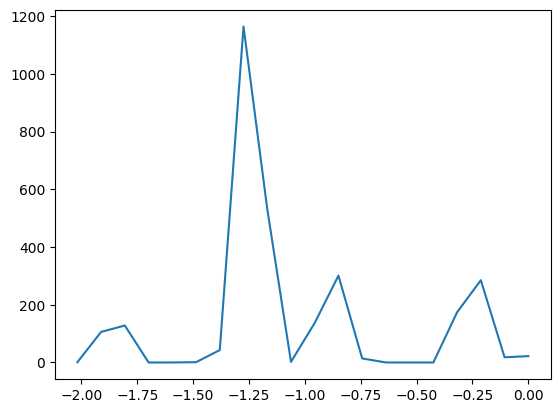

In [282]:
#rerun it for different basis to have all of 4 of them correct, it usually finds 3/4 eigenvalues
eig=eigenvalues_Rodeo(hamiltonian=HAMILTONIAN,N_param=8,sigma=15,number_of_intervals=20,superposition=True,initial_state=[1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3),0],show_plot=True)

In [284]:
print(eig.eigenvalues)

[-1.2744, -0.8495999999999999, -0.21239999999999992, -1.8054]


In [ ]:
#Models paramethers
S=8
N=5
states=[[int(i==j) for j in range(4)] for i in range(4)] #Hamiltonian matrices are self adjoint meaning that their eigenvalues form an orthonormal basis
                                                        #this means that if we find a "strong" relation between the eigenvalue and the input state(using for example the count
                                                        #of [1,1,1,1...] as measure) it would make sense to use orthogonal states. In our computations we will use the computational
                                                        #base as input base as it can easily be verified (empirically) that it gives strong results. For weak measure one might
                                                        #decide to change the current vector and rerun the code with a different vector and impose then orthogonality for the
                                                        #successive vectors

E=np.linspace(-2,0,num=number_intervals)
#In the paper they set the RMS of t to 10, if f is normal then RMS(r)=\sqrt(sigma^2+E[X]^2)
sigma=[5+2*i for i in range(S)]
N_param=[5+i for i in range(N)]

In [ ]:
#we run our algorithm inside a nested loop, we will thus find a matrix of results

for k in N_param:
  for j in sigma:
      t=np.random.normal(0, j, k)

      @qfunc
      def main(aux:Output[QArray[QBit]],w:CReal):

        #allocation block
          out=QArray("out", QBit)
          allocate(2, out)
          allocate(k, aux)

        #preparation of the state minus
          hadamard_transform(aux)
          for i in range(k):
            Z(aux[i])

        #controlled suzuki trotter step and phase step
          for i in range(k):
            control(aux[i],lambda:
            suzuki_trotter(
                HAMILTONIAN,
                evolution_coefficient=t[i],
                order=1,
                repetitions=30,
                qbv=out,))
          for i in range(k):
            PHASE(w*t[i],aux[i])

        #finally we had the hadamard
          hadamard_transform(aux)


    #execution step
      qmod = create_model(main)
      qprog = synthesize(qmod)

      execution_session = ExecutionSession(qprog)

    #we run a parametrized execution
      for l in E:
        results.append(execution_session.sample({"w": l}))

In [ ]:
#post processing of the results
res=[] #we create an empty vector called res that will store the counts of the vector [1,1,1,1,1...]
k=0
for i in range(len(results)):
  m=[1 for i in range(N_param[int(i/(10*S))])]
  for j in range(len(results[i].parsed_counts)):
    if str(list(results[i].parsed_counts[j])[0][1])=="{'aux': "+str(m)+"}" and k==0:   #doing stuff
      res.append([list(results[i].parsed_counts[j])[1][1]])
      k=1

  if k==0:
    res.append([0])
  k=0


In [ ]:
#we create a matching between N,sigma and the corresponding counts
l=[]
c=0
for i in range(len(N_param)):
  for j in range(len(sigma)):
    l.append([N_param[i],sigma[j],res[c][0]])
    c=c+1

In [ ]:
#importing libraries for the plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Line plot
ax.plot(m[:,0],m[:,1],m[:,2], color='r')

# Labels and title
ax.set_xlabel('N')
ax.set_ylabel("$\sigma$")
ax.set_zlabel('count')
ax.set_title('3D Line Plot')

# Show plot
plt.show()


#!!!!! note that this is not the correct way of doing this as one should consider all initial states, define some measure
#and then perform a hypothesis test to see which paramethers are the best. That being said from this (incomplete) plot we say that the best values might be N=6,sigms=19

import matplotlib.pyplot as plt

plt.plot(E, res,
    marker='o', # marker type
    markerfacecolor='blue', # color of marker
    markersize=4, # size of marker
    color='skyblue', # color of line
    linewidth=2 # change width of line
)
plt.xlabel('E')
plt.ylabel('Prob')
plt.show()

### Part 2: Implementing the Rodeo Algorithm for a 6D Hamiltonian

In this part, you will extend the implementation of the Rodeo Algorithm to solve a more complex 6D Hamiltonian, which represents a reduced model of the water H₂O molecule.

The **goal is to find the five lowest energy levels of this Hamiltonian.**

---

In [ ]:
import numpy as np

from classiq import *

np.random.seed(0)  # Please don't change

HAMILTONIAN_H2O = [
    PauliTerm([Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -12.533),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I, Pauli.I], -1.276),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.I, Pauli.I, Pauli.I, Pauli.I], 0.627),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I], -0.875),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], 0.452),
    PauliTerm([Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I, Pauli.I], 0.182),
    PauliTerm([Pauli.I, Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I], 0.139),
    PauliTerm([Pauli.Y, Pauli.Y, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -0.047),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.I], 0.209),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], -0.154),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.Z], 0.198),
    PauliTerm([Pauli.X, Pauli.I, Pauli.I, Pauli.I, Pauli.X, Pauli.I], 0.061),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Y, Pauli.I, Pauli.Y, Pauli.I], -0.027),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.Z], 0.118),
]

In [ ]:
### Your Code Goes Here ###
### Use as many cells as you need...

In [ ]:
### Your Code Goes Here ###
#HAM is the Hamiltonian as a np.matrix object
HAM=np.matrix(hamiltonian_to_matrix(HAMILTONIAN_H2O))

#finding the eigenvalues (and eigenvectors) of HAM
eigenvalues,eigenvectors=np.linalg.eigh(HAM)

#print the eigenvalues
print(eigenvalues)

In [ ]:
E_min=0
E_max=-5
number_intervals=10
E=np.linspace(E_min,E_max,num=number_intervals)
#In the paper they set the RMS of t to 10, if f is normal then RMS(r)=\sqrt(sigma^2+E[X]^2)

@qfunc
def main(aux:Output[QArray[QBit]],w:CReal):
    out=QArray("out", QBit)
    allocate(6, out)
    allocate(15, aux)
    hadamard_transform(aux)
    X(out[1])

    t=np.random.normal(0, 10, 10)

    for i in range(10):
      Z(aux[i])
    for i in range(10):
      control(aux[i],lambda:
      suzuki_trotter(
          HAMILTONIAN_H2O,
          evolution_coefficient=t[i],
          order=1,
          repetitions=30,
          qbv=out,))
    for i in range(10):
      phase(aux[i],w*t[i])

    hadamard_transform(aux)

qmod = create_model(main)
qprog = synthesize(qmod)

execution_session = ExecutionSession(qprog)
results=[]

for i in E:
  results.append(execution_session.sample({"w": i}))


In [ ]:
res=[]
m=[1 for i in range(10)]
k=0
for i in range(len(results)):
  for j in range(len(results[i].parsed_counts)):
    if str(list(results[i].parsed_counts[j])[0][1])=="{'aux': "+str(m)+"}" and k==0:
      res.append([list(results[i].parsed_counts[j])[1][1]])
      k=1

  if k==0:
    res.append([0])
  k=0

res

In [ ]:
### Your Code Goes Here ###

# Parameters for the Rodeo Algorithm
times = np.linspace(0.1, 1.0, 6)  # Evolution times for ancilla qubits
energies = np.linspace(-1.0, 1.0, 6)  # Energy levels for phase rotations

# Set up the quantum circuit
num_ancilla = len(times)
@qfunc
def main(ancilla: Output[QArray[QBit]], object_system: Output[QArray[QBit]]):
  allocate(num_ancilla, ancilla)  # Ancilla qubits
  allocate(6, object_system)  # 6D object system

  # Step 2: Initialize ancilla qubits to |1⟩ and apply Hadamard gates
  for i in range(num_ancilla):
      X(ancilla[i])  # Set ancilla to |1⟩
  hadamard_transform(ancilla)  # Apply Hadamard gates

  # Step 3: Controlled time evolution and phase rotation
  for n, t_n in enumerate(times):
      # Controlled Hamiltonian evolution

      control(ancilla[n], lambda:
        suzuki_trotter(
            HAMILTONIAN_H2O,
            evolution_coefficient=t_n,
            order=1,
            repetitions=30,
            qbv=object_system,
        )
      )

      # Phase rotation P(E * t_n)
      PHASE(energies[n] * t_n, ancilla[n])

  # Step 4: Final Hadamard on ancilla qubits
  hadamard_transform(ancilla)







# Simulate the circuit
qmod = create_model(main)
qprog = synthesize(qmod)


job = execute(qprog)
result = job.result()
print("The result of the arithmetic calculation: ", parsed_counts)

show(qprog)


In [ ]:
res=[]
m=[1 for i in range(10)]
k=0
for i in range(len(results)):
  for j in range(len(results[i].parsed_counts)):
    if str(list(results[i].parsed_counts[j])[0][1])=="{'aux': "+str(m)+"}" and k==0:
      res.append([list(results[i].parsed_counts[j])[1][1]])
      k=1

  if k==0:
    res.append([0])
  k=0

res